In [4]:
%matplotlib inline

from tensorflow.keras.layers import Dense, LSTM, Dropout
from tensorflow.keras.models import Sequential
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from url import URL
from pymongo import *
import statistics as stat
import matplotlib.pyplot as plt

import numpy as np
import pandas as pd
from time import strptime, mktime
import gc
import sys
import re
import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3'
gc.collect()

client = MongoClient(URL)
db = client.crypto_wallet


In [9]:
cwd = os.getcwd()
print(cwd)

/Users/hu5ky5n0w/Desktop/Crypto/Crypto_Predictor


In [10]:
def checkLen(a, b):
    if len(a) == len(b):
        return True
    else:
        return f'DB Objs:{len(a)} < Clean Arr Items:{len(b)}' if len(a) < len(b) else f'Clean Arr Items:{len(b)} < DB Objs:{len(a)}'

In [11]:
def p(o):
    return print(o)

In [12]:
def filterData(coll, st, narr):
    for obj in coll:
        try:
            tmp = obj.get(st)
            narr.append(tmp)
        except Exception as e:
            print(e, o['_id'])
    return narr

In [34]:
def datetime_converter(dtstr):
    tmstmp = strptime(dtstr, '%Y-%m-%d %H:%M:%S')
    epoch = mktime(tmstmp)
    return int(epoch)

In [36]:
bad_dt = '2019-08-21T17:46:08.978Z'
datetime = re.sub(r'\..*', '', bad_dt).replace('T', ' ').rstrip('Z')

In [37]:
print(f'{bad_dt} => {datetime_converter(dt)}')

2019-08-21T17:46:08.978Z => 1576318321


In [14]:
BTC_Tickers_Collection = db.BTC_Tickers
BTC_Tickers_Objs = list(BTC_Tickers_Collection.find())
BTC_epochs = []
BTC_prices = []
BTC_volumes = []
BTC_highs = []
BTC_lows = []
for obj in BTC_Tickers_Collection.find():
    dt = re.sub(r'\..*', '', obj.get('time')).replace('T', ' ').rstrip('Z')
    BTC_epochs.append(datetime_converter(dt))
    if float(obj.get('price')) == 0:
        print(obj['_id'])
    else:
        BTC_prices.append(float(obj.get('price')))
    BTC_volumes.append(obj.get('volume'))
    BTC_highs.append(obj.get('ask'))
    BTC_lows.append(obj.get('bid'))

In [15]:
for i,e in enumerate(BTC_epochs):
    if i == 0:
        pass
    else:
        BTC_epochs[i] = BTC_epochs[i-1]+ 60

In [16]:
p(checkLen(BTC_Tickers_Objs, BTC_prices))
p(checkLen(BTC_epochs, BTC_prices))
p(checkLen(BTC_Tickers_Objs, BTC_volumes))
p(checkLen(BTC_Tickers_Objs, BTC_highs))
p(checkLen(BTC_Tickers_Objs, BTC_lows))

True
True
True
True
True


In [18]:
# for obj in DB_Collection:
#     try:
#         # Handle varying dtypes/values for Price
#         if Price == 0: print(obj['_id'])
#         else: Prices.append(float(Price))

#         # Handle varying dtypes for RSI
#         if type(RSI) == float: RSIs.append(RSI)
#         elif type(RSI) == list:
#             if RSI[0] == None: pass
#             else: RSIs.append(stat.mean(RSI))
#         else: RSIs.append(float(RSI))
        
#         # Handle varying dtypes for OBV, slope
#         if type(OBV) == float: BTC_OBVs.append(OBV)
#         elif type(OBV) == list: BTC_OBVs.append(stat.mean(OBV))
#         else: BTC_OBVs.append(float(ADL))
#         if type(slope) == float: BTC_OBV_slope.append(slope)
#         elif type(slope) == list: BTC_ADL_slope.append(stat.mean(slope))
#         else: BTC_OBV_slope.append(float(slope))
        
#         # Handle varying dtypes for ADL, slope
#         if type(ADL) == float: BTC_ADLs.append(ADL)
#         elif type(ADL) == list: BTC_ADLs.append(stat.mean(ADL))
#         else: BTC_ADLs.append(float(ADL))
#         if type(slope) == float: BTC_ADL_slope.append(slope)
#         elif type(slope) == list: BTC_ADL_slope.append(stat.mean(slope))
#         else: BTC_ADL_slope.append(float(slope))

#     except Exception as e:
#         Errors.append(obj['_id'])
#         print(e, obj['_id'])
#         sys.exit(1)

In [19]:
BTC_RSI_Collection = db.BTC_RSI14_Data
BTC_RSI_Objs = list(BTC_RSI_Collection.find())
BTC_RSIs = []
Errors = []
for rsio in BTC_RSI_Collection.find():
    RSI = rsio.get('RSI')
    try:
        if type(RSI) == float:
            BTC_RSIs.append(int(RSI))
        elif type(RSI) == list:
            if RSI[0] == None:
                pass
            else:
                BTC_RSIs.append(int(stat.mean(RSI)))
        else:
            BTC_RSIs.append(RSI)
    except Exception as e:
        Errors.append(rsio['_id'])
        print(e, rsio['_id'])
        sys.exit(1)

In [20]:
if len(Errors) > 0:
    print(Errors)

In [21]:
p(checkLen(BTC_RSI_Objs, BTC_RSIs))

Clean Arr Items:177015 < DB Objs:179632


In [22]:
BTC_ADL_Collection = db.BTC_ADL_Data
BTC_ADL_Objs = list(BTC_ADL_Collection.find())
BTC_ADLs = []
BTC_ADL_slope = []
for o in BTC_ADL_Collection.find():
    ADL = o.get('ADL')
    slope = o.get('slope')
    try:
        if type(ADL) == float:
            BTC_ADLs.append(int(ADL))
        elif type(ADL) == list:
            BTC_ADLs.append(int(stat.mean(ADL)))
        else:
            BTC_ADLs.append(ADL)
        if type(slope) == int:
            BTC_ADL_slope.append(float(slope))
        elif type(slope) == list:
            BTC_ADL_slope.append(int(stat.mean(slope)))
        else:
            BTC_ADL_slope.append(slope)
    except Exception as e:
        print(e, o['_id'])
        sys.exit(1)

In [23]:
p(checkLen(BTC_ADL_Objs, BTC_ADLs))

p(checkLen(BTC_ADL_slope, BTC_ADLs))

True
True


In [2]:
# BTC_OBV_Collection = db.BTC_OBV_Data
# BTC_OBV_Objs = list(BTC_OBV_Collection.find())
# BTC_OBVs = []
# BTC_OBV_slope = []
# for o in BTC_OBV_Collection.find():
#     OBV = o.get('OBV')
#     slope = o.get('slope')
#     try:
#         if type(OBV) == float:
#             BTC_OBVs.append(int(OBV))
#         elif type(OBV) == list:
#             BTC_OBVs.append(int(stat.mean(OBV)))
#         else:
#             BTC_OBVs.append(ADL)
#         if type(slope) == int:
#             BTC_OBV_slope.append(float(slope))
#         elif type(slope) == list:
#             BTC_ADL_slope.append(int(stat.mean(slope)))
#         else:
#             BTC_OBV_slope.append(slope)
#     except Exception as e:
#         print(e, o['_id'])
#         sys.exit(1)

In [ ]:
p(checkLen(BTC_OBV_Objs, BTC_OBVs))
p(checkLen(BTC_OBV_slope, BTC_OBVs))

In [ ]:
print(f'datetime: {len(BTC_epochs)}\nprices: {len(BTC_prices)}')
collection_lengths = [len(BTC_volumes), len(BTC_highs), len(BTC_lows), len(BTC_ADLs), len(BTC_ADL_slope), len(BTC_OBVs), len(BTC_OBV_slope)]
print(f'Volumes: {len(BTC_RSIs)}\nHighs: {len(BTC_RSIs)}\nLows: {len(BTC_RSIs)}\nRSI: {len(BTC_RSIs)}\nADL_slp: {len(BTC_ADL_slope)}\nOBV_slp: {len(BTC_OBV_slope)}')

In [ ]:
min = collection_lengths[0]
for i in range(1, len(collection_lengths)):
    if collection_lengths[i] < min:
        min = collection_lengths[i]

In [ ]:
# BTC_Data = { 'Datetime': BTC_dt_epochs[0:min], 'Prices': BTC_prices[0:min], 'High': BTC_highs[0:min], 'Low': BTC_lows[0:min] }

BTC_Data = { 'Datetime': BTC_epochs[0:min], 
             'Prices': BTC_prices[0:min], 
             'Volumes':BTC_volumes[0:min],
             'High':BTC_highs[0:min], 
             'Low':BTC_lows[0:min],
             'RSI': BTC_RSIs[0:min],
             'ADL' : BTC_ADLs[0:min],
             'ADL_slope': BTC_ADL_slope[0:min],
             'OBV' : BTC_OBVs[0:min],
             'OBV_slope': BTC_OBV_slope[0:min] }

In [64]:
keys = BTC_Data.keys()
for k in keys:
    print(f'{k}: {len(BTC_Data[k])}')

Datetime: 112598
Prices: 112598
Volumes: 112598
High: 112598
Low: 112598
RSI: 112598
ADL: 112598
ADL_slope: 112598
OBV: 112598
OBV_slope: 112598


In [3]:
# BTC_df = pd.DataFrame(BTC_Data)
# BTC_df.tail()

In [68]:
BTC = pd.read_csv('BTC.csv')

In [69]:
BTC = BTC.drop('Unnamed: 0', axis=1)

In [70]:
BTC.head()

,Datetime,Prices,Volumes,High,Low,RSI,ADL,ADL_slope,OBV,OBV_slope
0,1560575162,8644.08,13197.701907,8644.86,8640.43,15.0,5203,-0.092510,8,-0.000454
1,1560575222,8644.08,13197.701907,8644.87,8640.50,15.0,10443,2.008249,5130,-0.092510
2,1560575282,8646.01,13197.701907,8646.01,8646.00,10.0,16145,1.985836,-5706,0.010063
3,1560575342,8646.01,13200.910764,8646.01,8646.00,9.0,9647,6.193095,5378,-0.003326
4,1560575402,8635.99,13200.910764,8635.37,8634.36,9.0,-4861,0.818087,10819,2.000370


In [71]:
BTC.tail()

,Datetime,Prices,Volumes,High,Low,RSI,ADL,ADL_slope,OBV,OBV_slope
142274,1569111602,8599.75,5156.555833,8602.94,8601.70,63.0,-2939162,0.995503,13216,-0.002195
142275,1569111662,8604.22,5178.209259,8604.22,8604.21,63.0,-2939162,0.995503,13216,-0.002195
142276,1569111722,8611.99,5176.608179,8611.83,8611.40,63.0,-2939162,0.995503,13216,-0.002195
142277,1569111782,8610.40,5179.082720,8610.40,8610.39,63.0,-2939162,0.995503,13216,-0.002195
142278,1569111842,8610.39,5181.263559,8610.40,8610.39,63.0,-2939162,0.995503,13216,-0.002195


In [62]:
BTC_df['High'] = BTC_df.High.astype('float64')
BTC_df['Low'] = BTC_df.Low.astype('float64')
BTC_df['RSI'] = BTC_df.RSI.astype('float64')
BTC_df['Volumes'] = BTC_df.Volumes.astype('float64')
BTC_df['ADL'] = BTC_df.ADL.astype('float64')
BTC_df['OBV'] = BTC_df.OBV.astype('float64')

In [64]:
scalar = MinMaxScaler(feature_range=(0, 1))
Prices = scalar.fit_transform([BTC_df.Prices])
High = scalar.fit_transform([BTC_df.High])
Low = scalar.fit_transform([BTC_df.Low])
RSI = scalar.fit_transform([BTC_df.RSI])
ADL = scalar.fit_transform([BTC_df.ADL])
OBV = scalar.fit_transform([BTC_df.OBV])
# OBV_slope = scalar.fit_transform([BTC_df.OBV_slope])

In [ ]:
ADL_avg = BTC_df.ADL.mean()
RSI_avg = BTC_df.RSI.mean()
ADL_slp_avg = BTC_df.ADL_slope.mean()
OBV_slp_avg = BTC_df.OBV_slope.mean()
values = {'OBV_slope': OBV_slp_avg, 'RSI': RSI_avg }
BTC_df = BTC_df.fillna(value=values)
BTC_df.head()

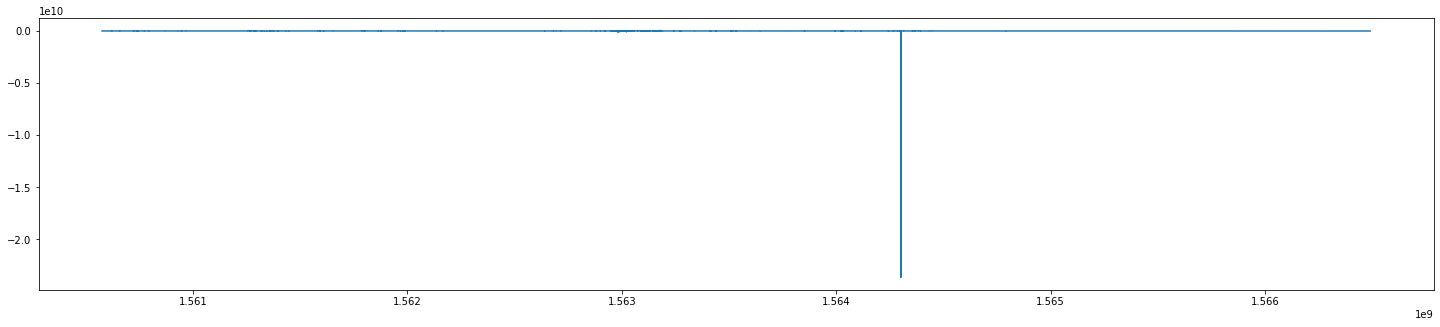

In [67]:
x = BTC_df.Datetime
y = BTC_df.ADL
plt.figure(figsize=[25,5])
plt.plot(x, y)
plt.show()

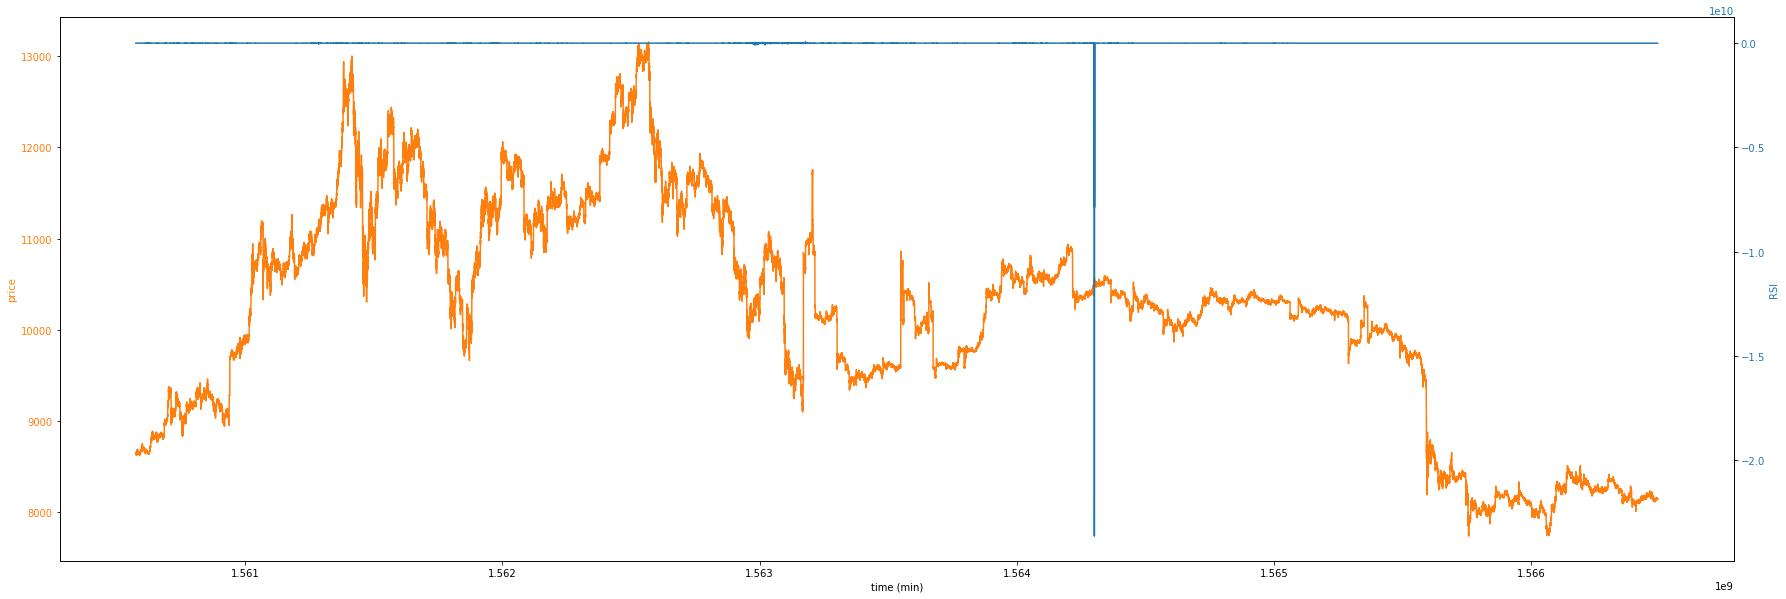

In [58]:
x = BTC_df.Datetime
fig, ax1 = plt.subplots(figsize=(30,10))
ax1.set_xlabel('time (min)')
ax1.set_ylabel('price', color='tab:orange')
ax1.plot(x, BTC_df.Prices, color='tab:orange')
ax1.tick_params(axis='y', labelcolor='tab:orange')

ax2 = ax1.twinx()
ax2.set_ylabel('RSI', color='tab:blue')
ax2.plot(x, BTC_df.ADL, color='tab:blue')
ax2.tick_params(axis='y', labelcolor='tab:blue')

plt.show()

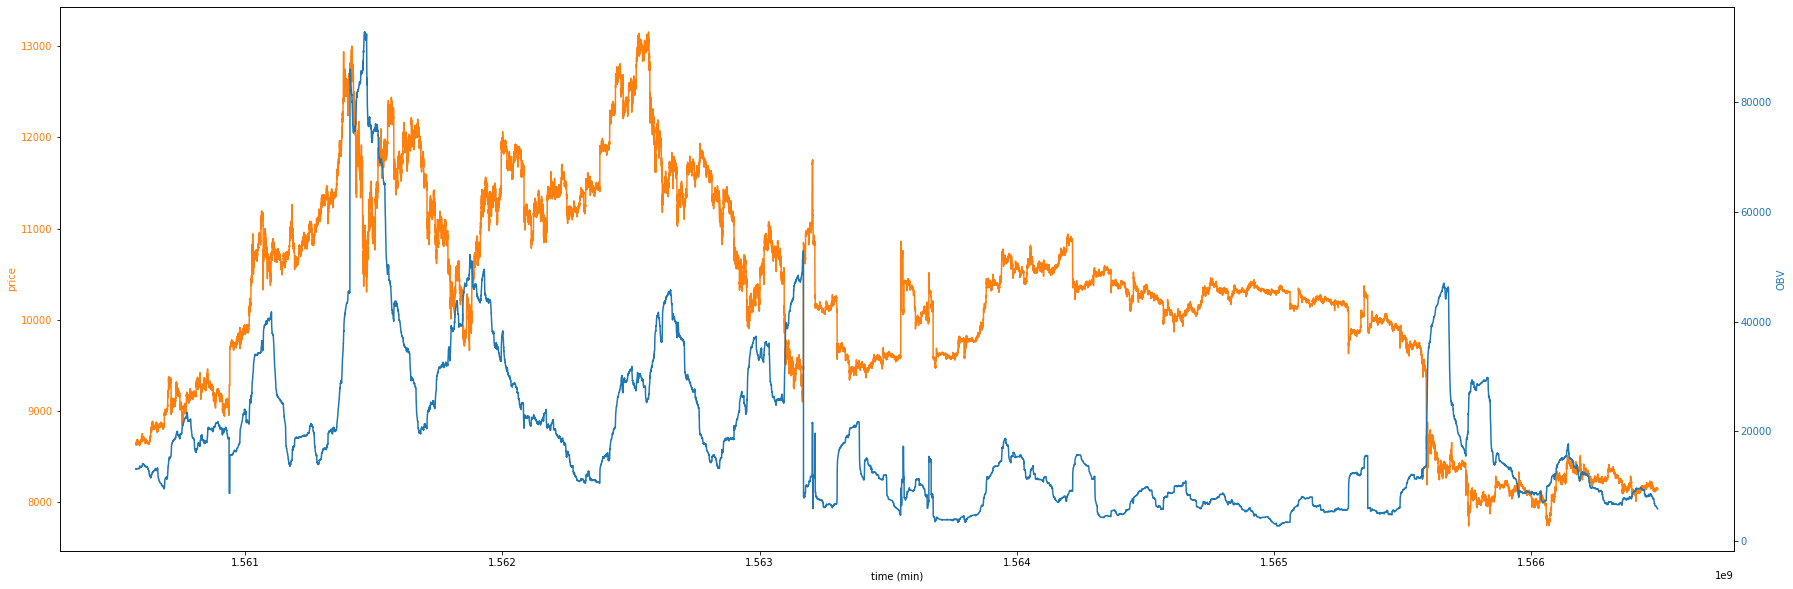

In [56]:
x = BTC_df.Datetime
fig, ax3 = plt.subplots(figsize=(30,10))
ax3.set_xlabel('time (min)')
ax3.set_ylabel('price', color='tab:orange')
ax3.plot(x, BTC_df.Prices, color='tab:orange')
ax3.tick_params(axis='y', labelcolor='tab:orange')

ax4 = ax3.twinx()
ax4.set_ylabel('OBV', color='tab:blue')
ax4.plot(x, BTC_df.RSI, color='tab:blue')
ax4.tick_params(axis='y', labelcolor='tab:blue')

plt.show()

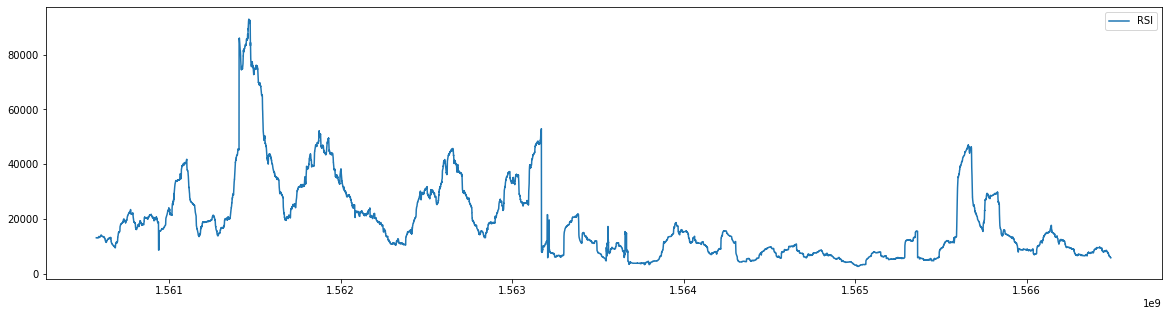

In [53]:
x = BTC_df.Datetime
y = BTC_df.RSI
plt.figure(figsize=[20,5])
plt.plot(x, y, label='RSI')
plt.legend()
plt.show()

In [32]:
scalar = MinMaxScaler(feature_range=(0, 1))
X_train = scalar.fit_transform(X_train)
X_test = scalar.fit_transform(X_test)

In [33]:
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1]))
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1]))

In [34]:
model = Sequential()

#input layer
model.add(LSTM(200, return_sequences=True, input_shape=(X_train.shape[1], 1)))
model.add(Dropout(0.2))

#hidden layer
model.add(LSTM(200, return_sequences=True))
model.add(Dropout(0.2))

# #hidden layer
model.add(LSTM(200, return_sequences=True))
model.add(Dropout(0.2))

# #hidden layer
model.add(LSTM(200, return_sequences=True))
model.add(Dropout(0.2))

# #hidden layer
model.add(LSTM(200, return_sequences=True))
model.add(Dropout(0.2))

# hidden layer
model.add(LSTM(200))
model.add(Dropout(0.2))

# output layer
model.add(Dense(1))

In [35]:
model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mae', 'mape'])
print(model.summary())

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 2, 200)            161600    
_________________________________________________________________
dropout (Dropout)            (None, 2, 200)            0         
_________________________________________________________________
lstm_1 (LSTM)                (None, 2, 200)            320800    
_________________________________________________________________
dropout_1 (Dropout)          (None, 2, 200)            0         
_________________________________________________________________
lstm_2 (LSTM)                (None, 2, 200)            320800    
_________________________________________________________________
dropout_2 (Dropout)          (None, 2, 200)            0         
_________________________________________________________________
lstm_3 (LSTM)                (None, 2, 200)            3

In [ ]:
model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=100, shuffle=True, batch_size=32)

In [ ]:
model_loss = model.evaluate(X_test, y_test, verbose=2) #verbose=0
print(model_loss)